**Level 1**
**Task 1: Student Score Prediction**

Description:


*   Dataset (Recommended): Student Performance Factors (Kaggle).
*   Build a model to predict students' exam scores based on their study hour.
*   Perform data cleaning and basic visualization to understand the datase.
*   Split the dataset into training and testing set.
*   Train a linear regression model to estimate final score.
*   Visualize predictions and evaluate model performance.







Tools & Libraries:


*   Python
*   Pandas
*   Matplotlib
*   Scikit-Learn


Covered Topics:


*   Regression
*   Evaluation Metrics






Bonus:


*   Try polynomial regression and compare performance.
*   Try experimenting with different feature combinations (e.g., removing or adding features like sleep, participation, etc.)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd


In [62]:
data = pd.read_csv('/content/StudentPerformanceFactors.csv')

Data Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


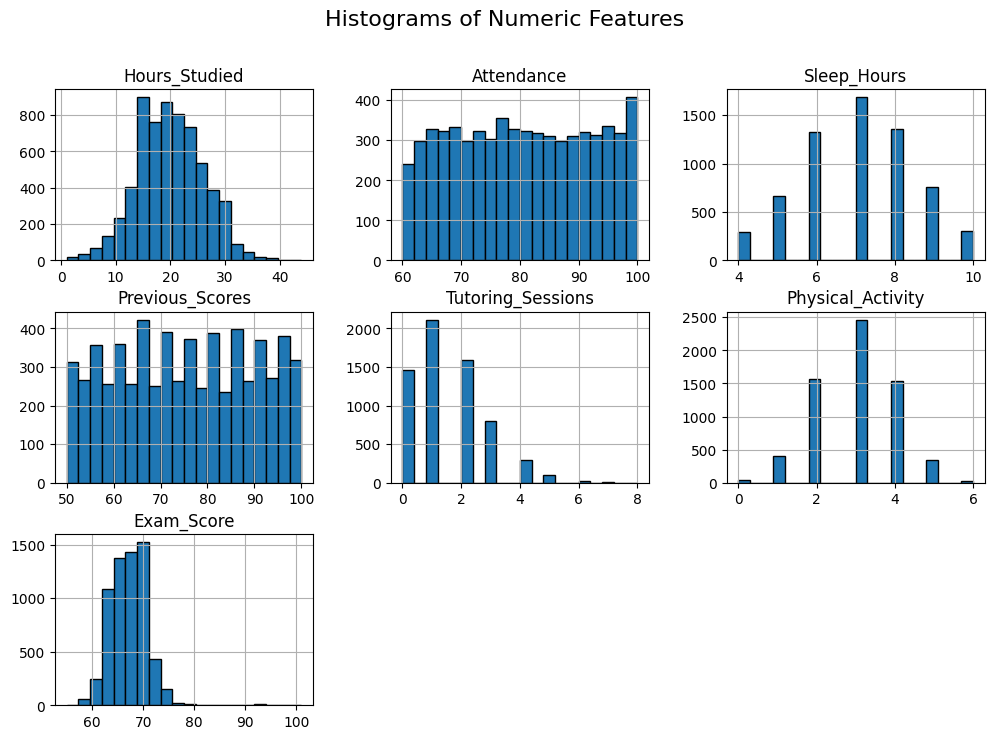

In [ ]:
data.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

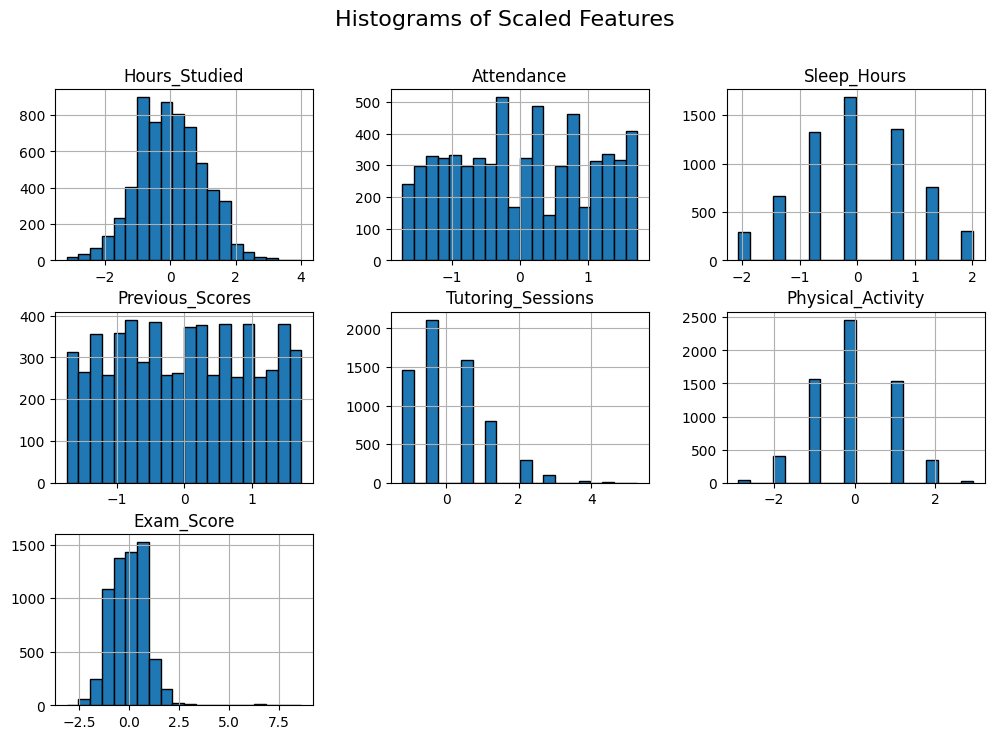

In [ ]:
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns
scaled_data = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

scaled_data.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Scaled Features", fontsize=16)
plt.show()

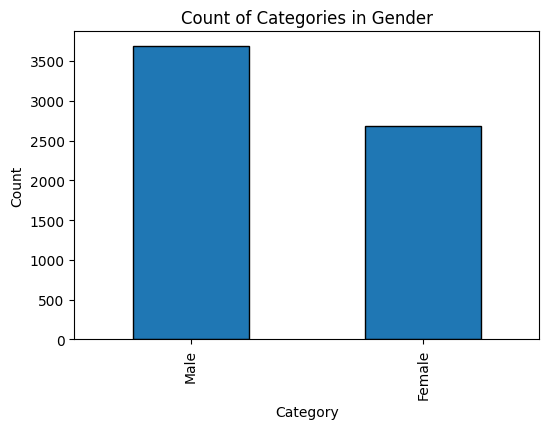

In [ ]:
plt.figure(figsize=(6, 4))
data["Gender"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Count of Categories in Gender")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

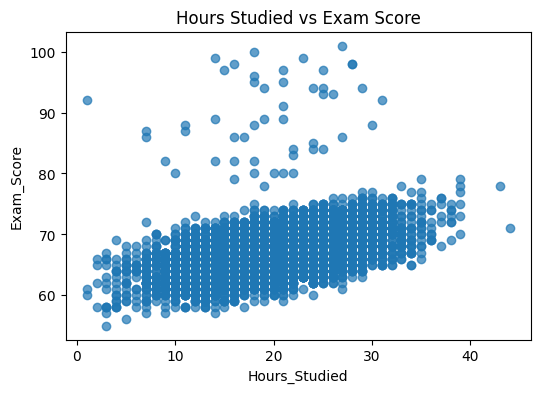

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(data["Hours_Studied"], data["Exam_Score"], alpha=0.7)
plt.xlabel("Hours_Studied")
plt.ylabel("Exam_Score")
plt.title("Hours Studied vs Exam Score")
plt.show()

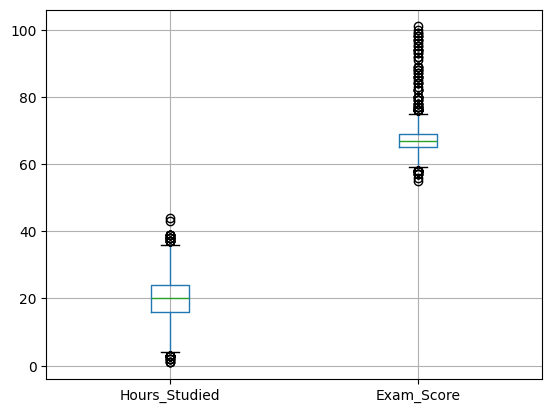

In [ ]:
data[["Hours_Studied", "Exam_Score"]].boxplot()
plt.show()

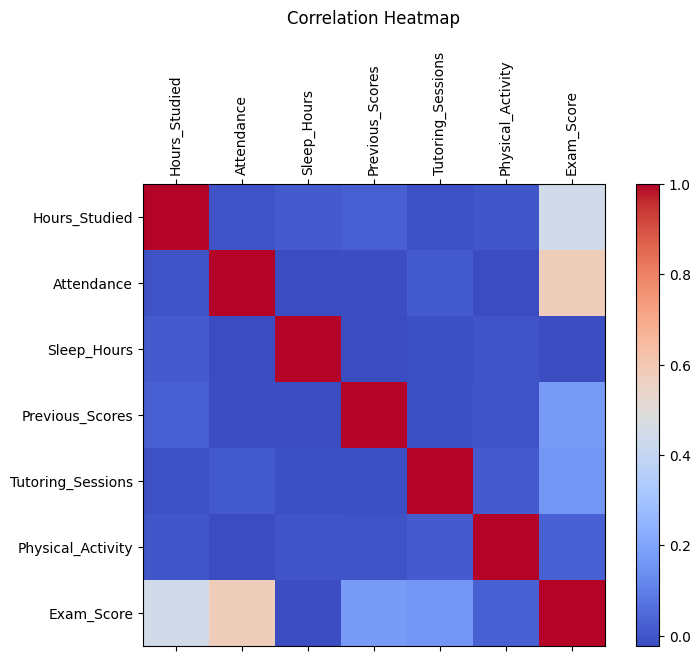

In [ ]:
corr = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap="coolwarm")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)
plt.title("Correlation Heatmap", pad=20)
plt.show()

In [ ]:
print(data.corr()["Exam_Score"].sort_values(ascending=False))

Exam_Score                    1.000000
Attendance                    0.580259
Hours_Studied                 0.445104
Previous_Scores               0.174283
Access_to_Resources           0.167856
Tutoring_Sessions             0.156829
Parental_Involvement          0.156014
Parental_Education_Level      0.105253
Peer_Influence                0.099133
Family_Income                 0.094555
Motivation_Level              0.088502
Teacher_Quality               0.075107
Extracurricular_Activities    0.063063
Internet_Access               0.051124
Physical_Activity             0.025148
Gender                       -0.004932
School_Type                  -0.010868
Sleep_Hours                  -0.017171
Learning_Disabilities        -0.083911
Distance_from_Home           -0.088083
Name: Exam_Score, dtype: float64


Data Cleaning

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6602,False
6603,False
6604,False
6605,False


In [63]:
# Drop Duplicates
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
## data cleaning
# handling missing values - done
# converting categorical variables - done
# addressing outliers - done
# removing duplicates and irrelavant data - done
# standardizing and correcting structural errors
# feature scaling (normalizion and standardization)

In [ ]:
# Handling Missing Values
round((data.isnull().sum()/data.shape[0])*100,2)

,0
Hours_Studied,0.00
Attendance,0.00
Parental_Involvement,0.00
Access_to_Resources,0.00
Extracurricular_Activities,0.00
Sleep_Hours,0.00
Previous_Scores,0.00
Motivation_Level,0.00
Internet_Access,0.00
Tutoring_Sessions,0.00


In [64]:
data.dropna(inplace=True)
#data.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [65]:
# Converting Categorical Variables
# Categorical columns
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numerical columns : ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


In [ ]:
data[cat_col].nunique()

,0
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Motivation_Level,3
Internet_Access,2
Family_Income,3
Teacher_Quality,3
School_Type,2
Peer_Influence,3
Learning_Disabilities,2


In [ ]:
#data = pd.get_dummies(data, columns=cat_col)
#data.info()

In [66]:
for col in data[cat_col].columns:
        unique_vals = data[col].unique()
        n_unique = len(unique_vals)

        # Case 1: Binary categorical
        if n_unique == 2:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

        # Case 2: Low/Medium/High ordinal column
        elif set(unique_vals) == set(["Low", "Medium", "High"]):
            encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 3: Negative/Neutral/Positive ordinal column
        elif set(unique_vals) == set(["Negative", "Neutral", "Positive"]):
            encoder = OrdinalEncoder(categories=[["Negative", "Neutral", "Positive"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 4: High School/College/Postgraduate ordinal column
        elif set(unique_vals) == set(["High School", "College", "Postgraduate"]):
            encoder = OrdinalEncoder(categories=[["High School", "College", "Postgraduate"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 5: Near/Moderate/Far ordinal column
        elif set(unique_vals) == set(["Near", "Moderate", "Far"]):
            encoder = OrdinalEncoder(categories=[["Near", "Moderate", "Far"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 6: Other categorical → One-Hot Encoding
        else:
            data = pd.get_dummies(data, columns=[col], drop_first=False)

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6378 non-null   int64  
 1   Attendance                  6378 non-null   int64  
 2   Parental_Involvement        6378 non-null   float64
 3   Access_to_Resources         6378 non-null   float64
 4   Extracurricular_Activities  6378 non-null   int64  
 5   Sleep_Hours                 6378 non-null   int64  
 6   Previous_Scores             6378 non-null   int64  
 7   Motivation_Level            6378 non-null   float64
 8   Internet_Access             6378 non-null   int64  
 9   Tutoring_Sessions           6378 non-null   int64  
 10  Family_Income               6378 non-null   float64
 11  Teacher_Quality             6378 non-null   float64
 12  School_Type                 6378 non-null   int64  
 13  Peer_Influence              6378 non-n

In [ ]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0.0,2.0,0,7,73,0.0,1,0,0.0,1.0,1,2.0,3,0,0.0,0.0,1,67
1,19,64,0.0,1.0,0,8,59,0.0,1,2,1.0,1.0,1,0.0,4,0,1.0,1.0,0,61
2,24,98,1.0,1.0,1,7,91,1.0,1,2,1.0,1.0,1,1.0,4,0,2.0,0.0,1,74
3,29,89,0.0,1.0,1,8,98,1.0,1,1,1.0,1.0,1,0.0,4,0,0.0,1.0,1,71
4,19,92,1.0,1.0,1,6,65,1.0,1,3,1.0,2.0,1,1.0,4,0,1.0,0.0,0,70


In [ ]:
# tried 3 methods for handling outliers, used the second one, it gives better results than the other 2 methods but not the best results overall

In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Keep only rows within bounds
  data2 = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
  print(data2.shape)

(6338, 20)
(6378, 20)
(6378, 20)
(6378, 20)
(5955, 20)
(6378, 20)
(6275, 20)


In [ ]:
# Handling Outliers
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Keep only rows within bounds
  data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
  print(data.shape)

(6338, 20)
(6338, 20)
(6338, 20)
(6338, 20)
(5915, 20)
(5915, 20)
(5836, 20)


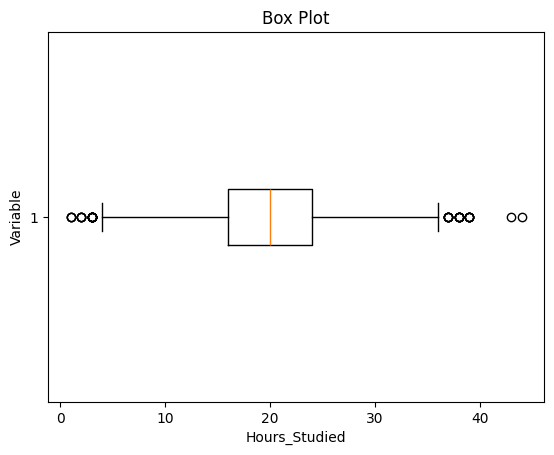

In [ ]:
# Addressing Outliers
plt.boxplot(data['Hours_Studied'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Hours_Studied')
plt.title('Box Plot')
plt.show()

In [ ]:
size = data.shape[1]
for i in range(size):
  mean = data.iloc[:, i].mean()
  std = data.iloc[:, i].std()
  lower_bound = mean - std*2
  upper_bound = mean + std*2
  data2 = data[(data.iloc[:, i] >= lower_bound)
                & (data.iloc[:, i] <= upper_bound)]
  print(data2.shape)


(6030, 20)
(6378, 20)
(6378, 20)
(6378, 20)
(6378, 20)
(5779, 20)
(6378, 20)
(6378, 20)
(5893, 20)
(5955, 20)
(6378, 20)
(6378, 20)
(6378, 20)
(6378, 20)
(6303, 20)
(5710, 20)
(6378, 20)
(5742, 20)
(6378, 20)
(6236, 20)


In [67]:
#Handling Outliers (used this one)
size = data.shape[1]
for i in range(size):
  mean = data.iloc[:, i].mean()
  std = data.iloc[:, i].std()
  lower_bound = mean - std*2
  upper_bound = mean + std*2
  data = data[(data.iloc[:, i] >= lower_bound)
                & (data.iloc[:, i] <= upper_bound)]
  print(data.shape)


(6030, 20)
(6030, 20)
(6030, 20)
(6030, 20)
(6030, 20)
(5464, 20)
(5464, 20)
(5464, 20)
(5035, 20)
(4699, 20)
(4699, 20)
(4241, 20)
(4241, 20)
(4241, 20)
(4190, 20)
(3771, 20)
(3771, 20)
(3385, 20)
(3385, 20)
(3305, 20)


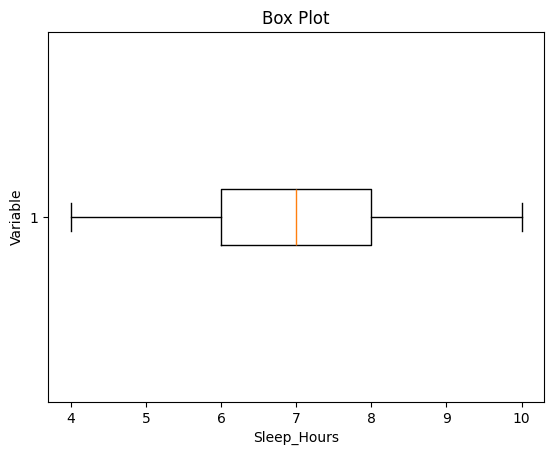

In [ ]:
plt.boxplot(data['Sleep_Hours'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Sleep_Hours')
plt.title('Box Plot')
plt.show()

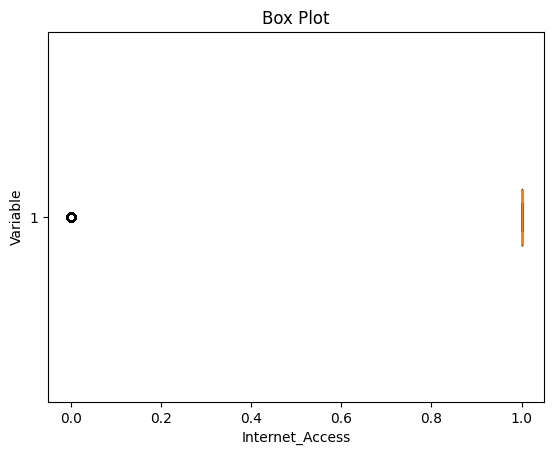

In [ ]:
plt.boxplot(data['Internet_Access'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Internet_Access')
plt.title('Box Plot')
plt.show()

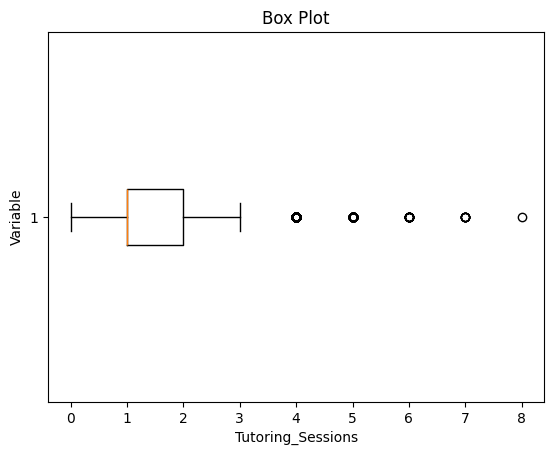

In [ ]:
plt.boxplot(data['Tutoring_Sessions'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Tutoring_Sessions')
plt.title('Box Plot')
plt.show()

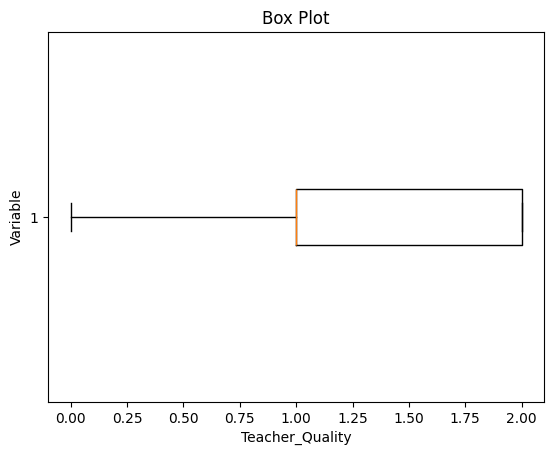

In [ ]:
plt.boxplot(data['Teacher_Quality'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Teacher_Quality')
plt.title('Box Plot')
plt.show()

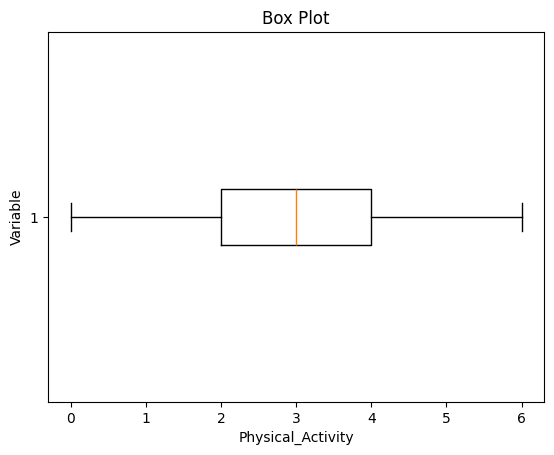

In [ ]:
plt.boxplot(data['Physical_Activity'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Physical_Activity')
plt.title('Box Plot')
plt.show()

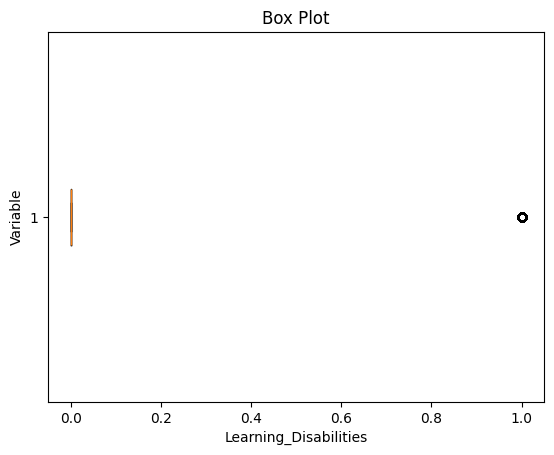

In [ ]:
plt.boxplot(data['Learning_Disabilities'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Learning_Disabilities')
plt.title('Box Plot')
plt.show()

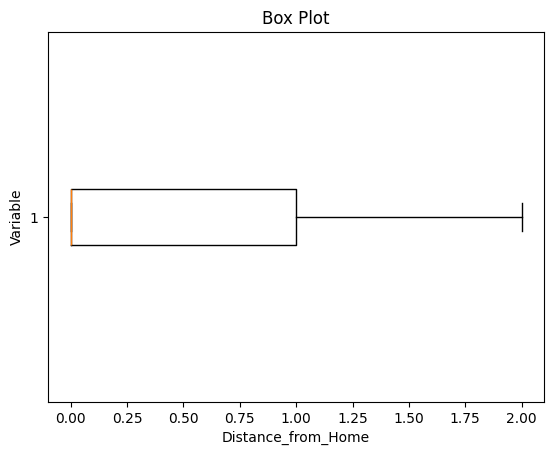

In [ ]:
plt.boxplot(data['Distance_from_Home'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Distance_from_Home')
plt.title('Box Plot')
plt.show()

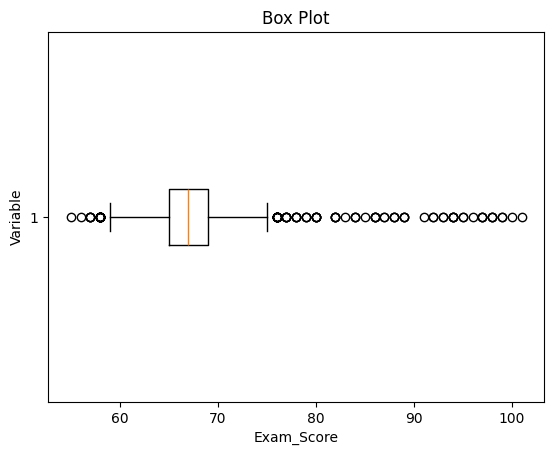

In [ ]:
plt.boxplot(data['Exam_Score'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Exam_Score')
plt.title('Box Plot')
plt.show()

In [ ]:
# calculate summary statistics
mean = data['Hours_Studied'].mean()
std  = data['Hours_Studied'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
data = data[(data['Hours_Studied'] >= lower_bound)
                & (data['Hours_Studied'] <= upper_bound)]

Lower Bound : 8.0061896322334
Upper Bound : 31.948027990845937


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6030 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6030 non-null   int64  
 1   Attendance                  6030 non-null   int64  
 2   Parental_Involvement        6030 non-null   float64
 3   Access_to_Resources         6030 non-null   float64
 4   Extracurricular_Activities  6030 non-null   int64  
 5   Sleep_Hours                 6030 non-null   int64  
 6   Previous_Scores             6030 non-null   int64  
 7   Motivation_Level            6030 non-null   float64
 8   Internet_Access             6030 non-null   int64  
 9   Tutoring_Sessions           6030 non-null   int64  
 10  Family_Income               6030 non-null   float64
 11  Teacher_Quality             6030 non-null   float64
 12  School_Type                 6030 non-null   int64  
 13  Peer_Influence              6030 non-n

In [68]:
target = ['Exam_Score']
input = ['Hours_Studied']
X = data[input[:]]
Y = data[target[:]]

In [ ]:
X = data[["Hours_Studied", "Sleep_Hours", "Attendance", "Previous_Scores"]]
Y = data["Exam_Score"]

In [ ]:
X = data[["Hours_Studied", "Attendance"]]
Y = data["Exam_Score"]

In [69]:
x_train, x_test_val, y_train, y_test_val = train_test_split(X, Y, test_size=0.3, random_state=50)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.6, random_state=50)

In [70]:
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)
x_val = min_max_scaler.transform(x_val)

In [ ]:
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
X[num_col_] = scaler.fit_transform(X[num_col_])
#X[num_col_] = scaler.fit_transform(x1[num_col_])
#x1 = X
# learning the statistical parameters for each of the data and transforming
#x1[num_col_] = scaler.fit_transform(x1[num_col_])
#x1.head()

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.6726752862247025


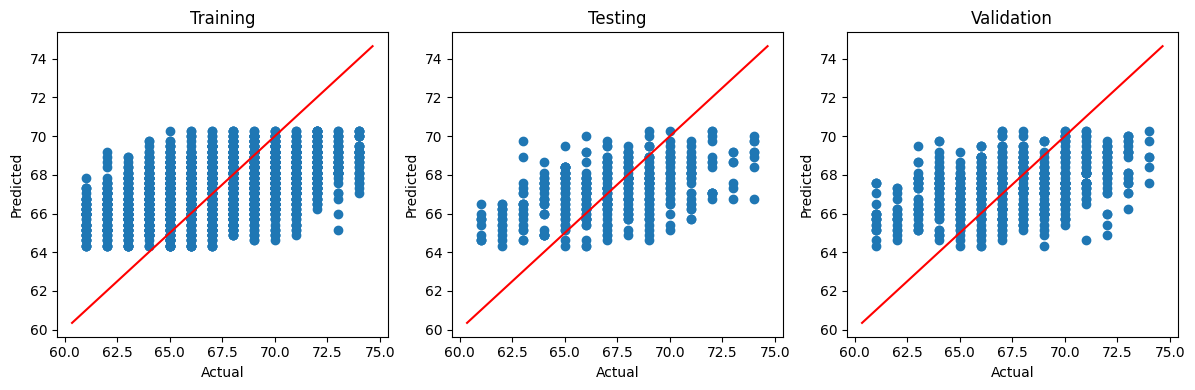

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Training set
axes[0].scatter(y_train, model.predict(x_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted", fontsize=10)
axes[0].set_title("Training")
xmin, xmax = axes[0].get_xlim()
axes[0].plot([xmin, xmax], [xmin, xmax], color="red")

# Testing set
axes[1].scatter(y_test, model.predict(x_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted", fontsize=10)
axes[1].set_title("Testing")
xmin, xmax = axes[1].get_xlim()
axes[1].plot([xmin, xmax], [xmin, xmax], color="red")

# Validation set
axes[2].scatter(y_val, model.predict(x_val))
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted", fontsize=10)
axes[2].set_title("Validation")
xmin, xmax = axes[2].get_xlim()
axes[2].plot([xmin, xmax], [xmin, xmax], color="red")

fig.tight_layout()
plt.show()

Trying Other Features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

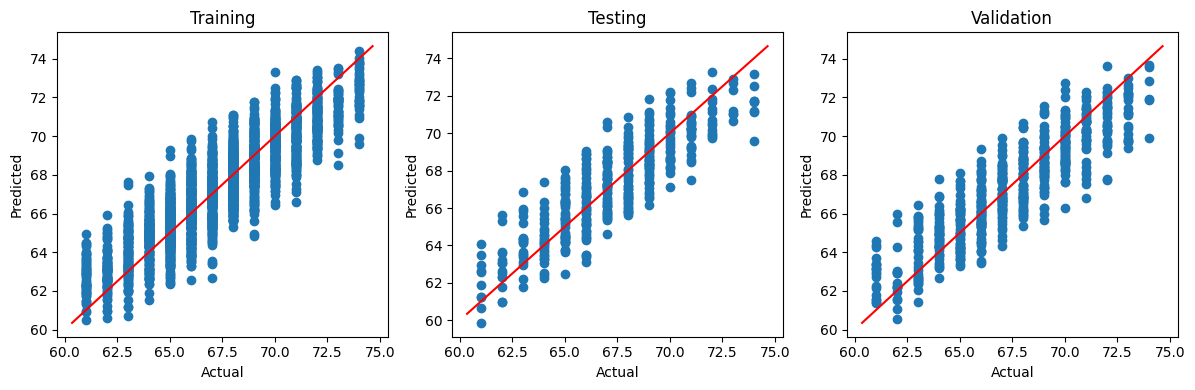

In [52]:
data = pd.read_csv('/content/StudentPerformanceFactors.csv')

# Drop Duplicates
data = data.drop_duplicates()
data.info()

data.dropna(inplace=True)
#data.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], axis=0, inplace=True)
data.info()

# Converting Categorical Variables
# Categorical columns
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Numerical columns :',num_col)

for col in data[cat_col].columns:
        unique_vals = data[col].unique()
        n_unique = len(unique_vals)

        # Case 1: Binary categorical
        if n_unique == 2:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

        # Case 2: Low/Medium/High ordinal column
        elif set(unique_vals) == set(["Low", "Medium", "High"]):
            encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 3: Negative/Neutral/Positive ordinal column
        elif set(unique_vals) == set(["Negative", "Neutral", "Positive"]):
            encoder = OrdinalEncoder(categories=[["Negative", "Neutral", "Positive"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 4: High School/College/Postgraduate ordinal column
        elif set(unique_vals) == set(["High School", "College", "Postgraduate"]):
            encoder = OrdinalEncoder(categories=[["High School", "College", "Postgraduate"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 5: Near/Moderate/Far ordinal column
        elif set(unique_vals) == set(["Near", "Moderate", "Far"]):
            encoder = OrdinalEncoder(categories=[["Near", "Moderate", "Far"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 6: Other categorical → One-Hot Encoding
        else:
            data = pd.get_dummies(data, columns=[col], drop_first=False)

data.info()

#Handling Outliers (used this one)
size = data.shape[1]
for i in range(size):
  mean = data.iloc[:, i].mean()
  std = data.iloc[:, i].std()
  lower_bound = mean - std*2
  upper_bound = mean + std*2
  data = data[(data.iloc[:, i] >= lower_bound)
                & (data.iloc[:, i] <= upper_bound)]
  print(data.shape)

X = data[["Hours_Studied", "Sleep_Hours", "Attendance", "Previous_Scores"]]
Y = data["Exam_Score"]

x_train, x_test_val, y_train, y_test_val = train_test_split(X, Y, test_size=0.3, random_state=50)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.6, random_state=50)

min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)
x_val = min_max_scaler.transform(x_val)

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Training set
axes[0].scatter(y_train, model.predict(x_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted", fontsize=10)
axes[0].set_title("Training")
xmin, xmax = axes[0].get_xlim()
axes[0].plot([xmin, xmax], [xmin, xmax], color="red")

# Testing set
axes[1].scatter(y_test, model.predict(x_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted", fontsize=10)
axes[1].set_title("Testing")
xmin, xmax = axes[1].get_xlim()
axes[1].plot([xmin, xmax], [xmin, xmax], color="red")

# Validation set
axes[2].scatter(y_val, model.predict(x_val))
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted", fontsize=10)
axes[2].set_title("Validation")
xmin, xmax = axes[2].get_xlim()
axes[2].plot([xmin, xmax], [xmin, xmax], color="red")

fig.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

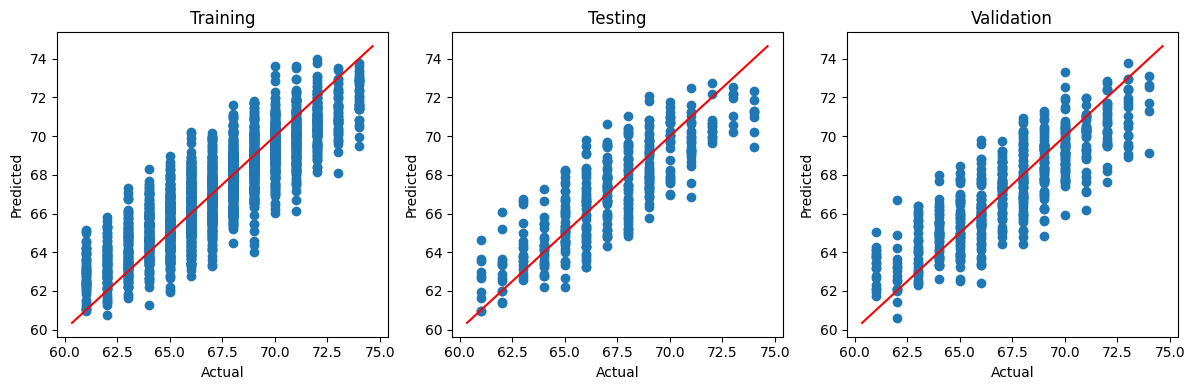

In [53]:
data = pd.read_csv('/content/StudentPerformanceFactors.csv')

# Drop Duplicates
data = data.drop_duplicates()
data.info()

data.dropna(inplace=True)
#data.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], axis=0, inplace=True)
data.info()

# Converting Categorical Variables
# Categorical columns
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Numerical columns :',num_col)

for col in data[cat_col].columns:
        unique_vals = data[col].unique()
        n_unique = len(unique_vals)

        # Case 1: Binary categorical
        if n_unique == 2:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

        # Case 2: Low/Medium/High ordinal column
        elif set(unique_vals) == set(["Low", "Medium", "High"]):
            encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 3: Negative/Neutral/Positive ordinal column
        elif set(unique_vals) == set(["Negative", "Neutral", "Positive"]):
            encoder = OrdinalEncoder(categories=[["Negative", "Neutral", "Positive"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 4: High School/College/Postgraduate ordinal column
        elif set(unique_vals) == set(["High School", "College", "Postgraduate"]):
            encoder = OrdinalEncoder(categories=[["High School", "College", "Postgraduate"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 5: Near/Moderate/Far ordinal column
        elif set(unique_vals) == set(["Near", "Moderate", "Far"]):
            encoder = OrdinalEncoder(categories=[["Near", "Moderate", "Far"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 6: Other categorical → One-Hot Encoding
        else:
            data = pd.get_dummies(data, columns=[col], drop_first=False)

data.info()

#Handling Outliers (used this one)
size = data.shape[1]
for i in range(size):
  mean = data.iloc[:, i].mean()
  std = data.iloc[:, i].std()
  lower_bound = mean - std*2
  upper_bound = mean + std*2
  data = data[(data.iloc[:, i] >= lower_bound)
                & (data.iloc[:, i] <= upper_bound)]
  print(data.shape)

X = data[["Hours_Studied", "Attendance"]]
Y = data["Exam_Score"]

x_train, x_test_val, y_train, y_test_val = train_test_split(X, Y, test_size=0.3, random_state=50)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.6, random_state=50)

min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)
x_val = min_max_scaler.transform(x_val)

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Training set
axes[0].scatter(y_train, model.predict(x_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted", fontsize=10)
axes[0].set_title("Training")
xmin, xmax = axes[0].get_xlim()
axes[0].plot([xmin, xmax], [xmin, xmax], color="red")

# Testing set
axes[1].scatter(y_test, model.predict(x_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted", fontsize=10)
axes[1].set_title("Testing")
xmin, xmax = axes[1].get_xlim()
axes[1].plot([xmin, xmax], [xmin, xmax], color="red")

# Validation set
axes[2].scatter(y_val, model.predict(x_val))
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted", fontsize=10)
axes[2].set_title("Validation")
xmin, xmax = axes[2].get_xlim()
axes[2].plot([xmin, xmax], [xmin, xmax], color="red")

fig.tight_layout()
plt.show()

Polynomial Regression

In [92]:
data = pd.read_csv('/content/StudentPerformanceFactors.csv')

# Drop Duplicates
data = data.drop_duplicates()
data.info()

data.dropna(inplace=True)
#data.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], axis=0, inplace=True)
data.info()

# Converting Categorical Variables
# Categorical columns
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Numerical columns :',num_col)

for col in data[cat_col].columns:
        unique_vals = data[col].unique()
        n_unique = len(unique_vals)

        # Case 1: Binary categorical
        if n_unique == 2:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

        # Case 2: Low/Medium/High ordinal column
        elif set(unique_vals) == set(["Low", "Medium", "High"]):
            encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 3: Negative/Neutral/Positive ordinal column
        elif set(unique_vals) == set(["Negative", "Neutral", "Positive"]):
            encoder = OrdinalEncoder(categories=[["Negative", "Neutral", "Positive"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 4: High School/College/Postgraduate ordinal column
        elif set(unique_vals) == set(["High School", "College", "Postgraduate"]):
            encoder = OrdinalEncoder(categories=[["High School", "College", "Postgraduate"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 5: Near/Moderate/Far ordinal column
        elif set(unique_vals) == set(["Near", "Moderate", "Far"]):
            encoder = OrdinalEncoder(categories=[["Near", "Moderate", "Far"]])
            data[col] = encoder.fit_transform(data[[col]])

        # Case 6: Other categorical → One-Hot Encoding
        else:
            data = pd.get_dummies(data, columns=[col], drop_first=False)

data.info()

#Handling Outliers (used this one)
size = data.shape[1]
for i in range(size):
  mean = data.iloc[:, i].mean()
  std = data.iloc[:, i].std()
  lower_bound = mean - std*2
  upper_bound = mean + std*2
  data = data[(data.iloc[:, i] >= lower_bound)
                & (data.iloc[:, i] <= upper_bound)]
  print(data.shape)

target = ['Exam_Score']
input = ['Hours_Studied']
X = data[input[:]]
Y = data[target[:]]

x_train, x_test_val, y_train, y_test_val = train_test_split(X, Y, test_size=0.3, random_state=50)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.6, random_state=50)

min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)
x_val = min_max_scaler.transform(x_val)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [71]:
model = Pipeline([
    ("poly", PolynomialFeatures(degree=4)),
    ("linreg", LinearRegression())
])

model.fit(X, Y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('linreg', LinearRegression())])

In [72]:
lin = LinearRegression()

lin.fit(X, Y)

LinearRegression()

In [73]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, Y)
lin2 = LinearRegression()
lin2.fit(X_poly, Y)

LinearRegression()

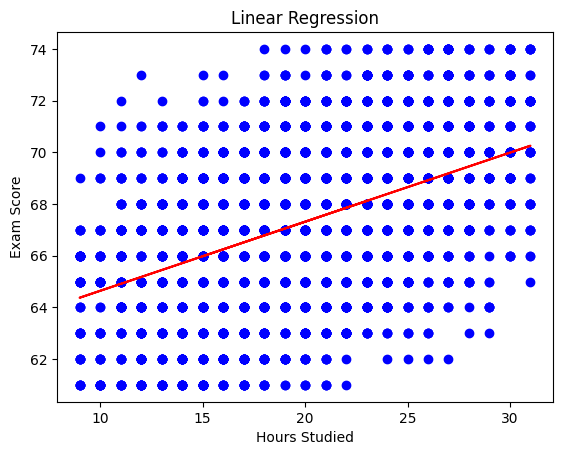

In [74]:
plt.scatter(X, Y, color='blue')

plt.plot(X, lin.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

plt.show()

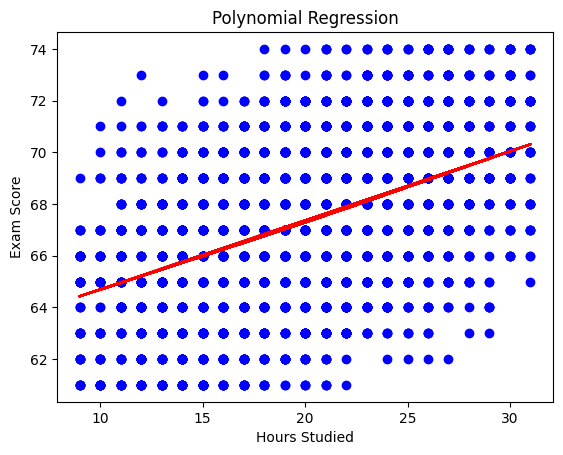

In [75]:
plt.scatter(X, Y, color='blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

plt.show()

In [77]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.742374116585395


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


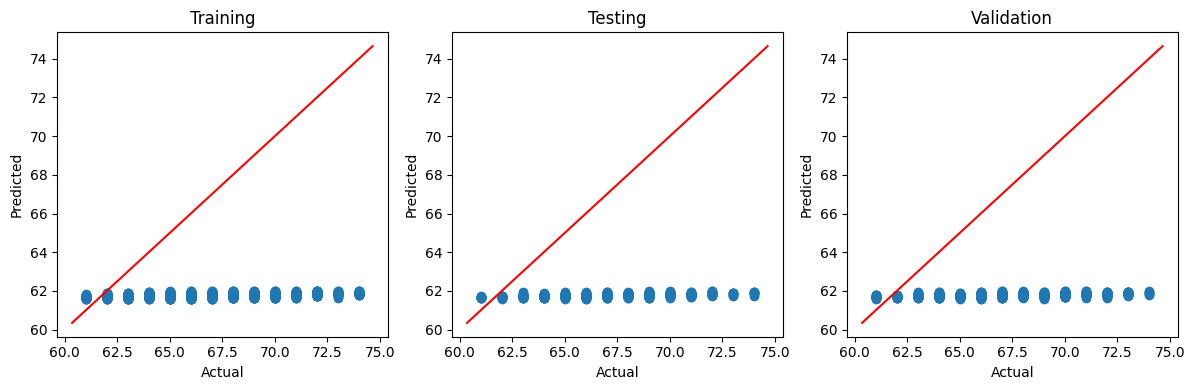

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Training set
axes[0].scatter(y_train, model.predict(x_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted", fontsize=10)
axes[0].set_title("Training")
xmin, xmax = axes[0].get_xlim()
axes[0].plot([xmin, xmax], [xmin, xmax], color="red")

# Testing set
axes[1].scatter(y_test, model.predict(x_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted", fontsize=10)
axes[1].set_title("Testing")
xmin, xmax = axes[1].get_xlim()
axes[1].plot([xmin, xmax], [xmin, xmax], color="red")

# Validation set
axes[2].scatter(y_val, model.predict(x_val))
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted", fontsize=10)
axes[2].set_title("Validation")
xmin, xmax = axes[2].get_xlim()
axes[2].plot([xmin, xmax], [xmin, xmax], color="red")

fig.tight_layout()
plt.show()

In [79]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [80]:
model = LinearRegression()
model.fit(X_poly, Y)

LinearRegression()

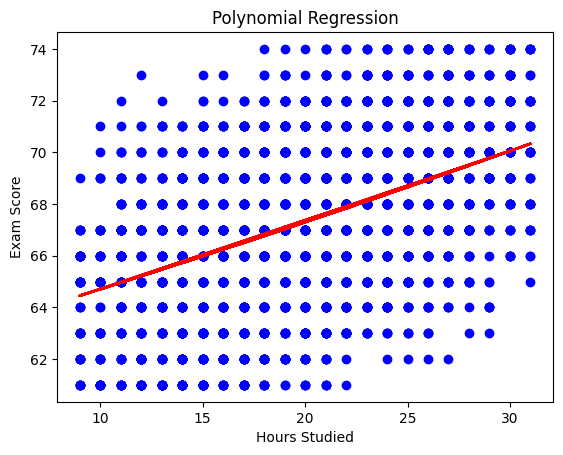

In [82]:
#poly = PolynomialFeatures(degree=4)
poly = PolynomialFeatures(degree=2, include_bias=False)

#X_poly = poly.fit_transform(X)
poly.fit(X_poly, Y)
lin2 = LinearRegression()
lin2.fit(X_poly, Y)
plt.scatter(X, Y, color='blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

plt.show()

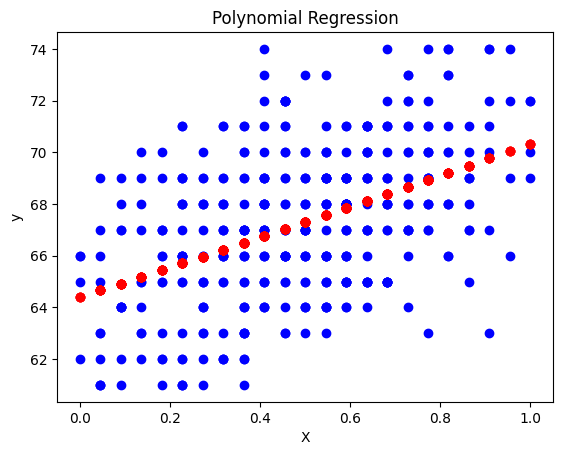

In [83]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Plotting
plt.scatter(x_test, y_test, color='blue')
plt.scatter(x_test, y_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Evaluation of Model Performance

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# Training metrics
y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))

# Testing metrics
y_test_pred = model.predict(X_test)
print("Test R²:", r2_score(y_test, y_test_pred))


Train R²: 0.20652390202742987
Test R²: 0.19850608303204254
